<img src = "static/AtlassianSydneyLogo.png" width = 300 height = 300 style = "float:right">

# the abc's of nlp 
## (with practical examples)

Geoff Pidcock (with help from Geoff Sims) <br>
[Atlassian](https://www.atlassian.com/) Sydney <br>
<br>
*Revised March 2020*




<img src = "static/warning.png" width = 200 height = 200 style = "float:right; padding-right: 40px">

## but first, a warning




**I am also following my "hat over the wall" with NLP.** <br>

Take this all with a grain of salt - and feedback is welcome! :)





## *hat over the wall - whaaat?*

**Quoting John F. Kennedy** in his speech at the Dedication of the Aerospace Medical Health Center, San Antonio, Texas, November 21, 1963. 

<img src = "static/Kennedy.jpg" width = 300 height = 400 style = "float:left; padding-left: 40px; padding-right: 40px">

>Frank O’Connor, the Irish writer, tells in one of his books how, as a boy, he and his friends would make their way across the countryside, and when they came to an orchard wall that seemed too high and too doubtful to try and too difficult to permit their voyage to continue, **they took off their hats and tossed them over the wall– and then they had no choice but to follow them.**

### It's a pretty good strategy in forcing yourself to learn things!

## today's agenda
<br>

- quick definitions
- why bother
- common ways of modelling text
- a practical example!

# quick definitions

Natural Language Processing, or **NLP**, is the application of statistics and computers to extract meaning from text data.


Common methods of NLP include:
- **Topic Modelling** or what theme or topic is within a document.
- **Entity Extraction** or understanding the who, what, where, when, and how within a document.
- **Sentiment Analysis** or understanding the emotional meaning of documents
- **Classification** of a document into an existing class
- **Text translation** of a document from one language to another
- **Recommendation Systems** for documents matching one another
- **Text Summarisation**, **Text Generation**, .... 

`it's a big field :O`

# why bother

## you can tell powerful stories (1)
Entity Extraction enables the New York Times to keep a **running total** of all the things insulted by Trump on Twitter.
![NewYorkTimes](static/NewYorkTimes.png)

### sadly, NYT have not updated since May 19, but here's a question...

<img src = "static/TrumpForecast.png" width = 600 height = 400 style = "float:left">

## you can join the big ethics debate! (2)



### models "too dangerous to be released" are now creating essays fooling judges
The below tweet by the CEO of OpenAI points out that this is ridiculous <br>
[(see this article)](https://www.economist.com/open-future/2019/10/01/how-to-respond-to-climate-change-if-you-are-an-algorithm)

<img src = "static/EconomistSubmission.png" width = 300 height = 200 style = "float:centre; padding-right: 40px">


### .. so let's create models that are the "poison as well as the cure" (to fake news) 

- GROVER (to join BERT and ELMo)
- Grover is short for "**G**enerating a**R**ticles by **O**nly **V**iewing m**E**tada **R**ecords"

[Image Source - "Defending Against Neural Fake News"](https://arxiv.org/abs/1905.12616)
<br>


![Grover](static/Grover.png)

## these systems are touching our daily lives (3)
As of Feb 2020, Google's translation service can be used on 108 languages [source: the verge](https://www.theverge.com/2020/2/26/21154417/google-translate-new-languages-support-odia-tatar-turkmen-uyghur-kinyarwanda)

![GoogleTranslate](static/GoogleTranslate.png)

## they can solve big problems for companies

### E.g. classifying topics of support tickets so the support engineer with the right skills works on it
**Credit: Geoff Sims**
(More info on this can be found in his presentation at [Atlassian Open](https://www.atlassian.com/company/events/summit-europe/watch-sessions/2018/service-and-support/inside-atlassian-transforming-customer-support-with-artificial-intelligence))

![SupportTicket](static/SupportTicket.png)

![Routing](static/Routing.png)

### Deep dive on Atlassian NLP use case:
#### Situation:
- Atlassian develops technology that enables collaboration within teams. Jira, BitBucket, Trello, and Confluence are some of its better known products.

- These products have millions of users to support, and they at times have VERY technical needs.

- How do we route support tickets to the right Support Engineer so that the ticket can get resolved in the shortest amount of time?

- To talk scale, ~100K tickets per year, worked by 500+ agents, and before this project the tickets were manually allocated by team leads.

#### Solution:
- Supervised Classification of a ticket’s topic using “natural language processing”
- Took the raw unstructured text from 100K support tickets
- Tried to encode the words as vectors that retained their meaning - Word2Vec – to understand “Atlassian English” (instead of a generic model)
- Classification of tickets into topics that enable better routing

#### Results:
- Word2Vec model provided unique and relevant outputs – i.e. Frozen relates to browser, instead of winter (relative to a google benchmark)
- Delivered an 80% prediction accuracy on ticket topic – which was judged “good enough”.
- Found to drive faster resolution (making the customer happier), and save the team leads time (and the company money).

# common ways of modelling text

In order for computers to understand text, we need to convert the text to a numerical input. What follows are some example models to do just that. 


## bag of words
A text is represented as the bag or multiset of it's words, where the multiplicity is kept, but grammar and order is ignored.

![Bag of Words](static/BagOfWords.png)

[credit - Hady Elsahar](https://www.slideshare.net/hadyelsahar/word-embedings-why-the-hype-55769273)

## bag of words with term frequency * inverse of document frequency (tfidf) scoring

As the output of a bag of words model is a high dimension, sparse, matrix, practioners frequently use this measure to "weight" each word within the matrix, enabling the exclusion of unimportant words. 

i.e. for each term $t$ in a document $d$ that is part of a collection of documents $D$:

$$tfidf(t,d,D) = tf(t,d)*idf(t,D)$$

where: <br>
$tf$ is the term frequency within a document $d$ <br>
$idf$ is the inverse of the term frequency within the collection of documents $D$

**[Equation](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)** 

**Rule of Thumb:** Words appearing in a large number of documents are not significant. 


![Bag of Words](static/tfidf_BagOfWords.png)

[credit - Hady Elsahar](https://www.slideshare.net/hadyelsahar/word-embedings-why-the-hype-55769273)

### this may seem simple, but this can be effective!

At Salesforce we were able to **double** the sizes of certain marketing segments (like IT manager) using a bag of words model and random forest model to classify job titles to job function.   

> eg. We had a manually tagged dataset of job title and job function. New titles were tagged as "other" by the systmem until they could be manually classified. So we created a bag of words model using the collection of titles, and used a multi-class random forest model.

Don't just take it from me - **Emmanuel Ameisen** in [How to solve 90% of NLP problems: a step by step guide](https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e) advocates for bag of word models and logistic regressors for their simplicity and explainability, and at 18K claps, provides an extremely well regarded reference.

## word vectors or embeddings

>Word vectors are multi-dimensional mathematical representations of words created using deep learning methods. They give us insight into relationships between words in a corpus.


Example (credit [Katharine Jarmul](https://kjamistan.com/))
![WordVectors](static/word_vectors.png)

### How do we make them?
Oh my goodness it's a deep topic - but there's a good reference [here](https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469). <br>

# text processing is *typically* needed before modelling

## Table of common methods, their inputs, and their outputs
Method Name | Quick Definition | Example Input | Example Output
--- | --- | --- | ---
Sentence Segmentation | The splitting of sentences to text | `Mark met the president. He said:”Hi! What’s up -Alex?”` | `['Mark met the president','He said:”Hi! What’s up -Alex?']`
Tokenization | The splitting of text into words, numbers, punctuation, etc | `My phone tries to move to ‘charging’ from ‘discharging’ state.` | `['My', 'phone', 'tries', 'to', 'move', 'to', ‘charging’, 'from', '‘discharging’', 'state', '.']`
Stemming/Lemmatization | Reducing similar words to their common stem | `Drinking, Drank, Drunk` | `Drink`
Part-of-Speech tagging | tagging tokens with their part of speech, to enable semantic meaning analysis | `[‘Can’, ‘you’, ‘please’, ‘buy’, ‘me’, ‘an’, ‘Arizona’, ‘Ice’, ‘Tea’, ‘?’, ‘It’, “‘s”, ‘$’, ‘0.99’, ‘.’]` | `[(‘Can’, ‘MD’), (‘you’, ‘PRP’), (‘please’, ‘VB’), (‘buy’, ‘VB’), (‘me’, ‘PRP’), (‘an’, ‘DT’), (‘Arizona’, ‘NNP’), (‘Ice’, ‘NNP’), (‘Tea’, ‘NNP’), (‘?’, ‘.’), (‘It’, ‘PRP’), (“‘s”, ‘VBZ’), (‘$’, ‘$’), (‘0.99’, ‘CD’), (‘.’, ‘.’)]`
Stop word removal | the exclusion of low meaning stop words from the document | `[‘Can’, ‘you’, ‘please’, ‘buy’, ‘me’, ‘an’, ‘Arizona’, ‘Ice’, ‘Tea’, ‘?’, ‘It’, “‘s”, ‘$’, ‘0.99’, ‘.’]` | `[‘please’, ‘buy’, ‘Arizona’, ‘Ice’, ‘Tea’]`


# common libraries encountered (in python) when doing nlp

**nltk**
- Contains a broad range of tools and lexical resources - like **WordNet**.
- Helpful for tokenization, stemming, lemmatization, tagging, parsing, semantic reasoning...
- The standard workhorse of doing NLP in python.

**SpaCy**
- Efficient implementations of NLP techniques/algorithms for large scale information extraction tasks.
- Written from the ground up in Cython.
- Supports several languages and provides pre-trained word vectors.
- Works well with other tools in the ecosystem (like Tensorflow, PyTorch, Scikit-Learn, Gensim...)

### common libraries continued
**Gensim**
- Capable of topic modelling and similarity analysis. 
- Contains a Python port of Google's very popular **[Word2Vec model](https://www.youtube.com/watch?v=LSS_bos_TPI)** - which can transform words into semantic embeddings, where similar words occur close to each other. 
- Commonly used in semantic analysis and feature engineering



**FastText**
- Open Sourced by Facebook in 2016
- a "Bag of Tricks" for efficient word vectorisation and text classification. 

# today's practical example

## Classification of Amazon Review Topics
The Atlassian team has the problem of having more feedback than it has time to manually parse and learn from. <br>
If we had a method that could group similar ‘documents’ of feedback together into topics, than we could better manage and respond to this feedback. <br>
We'll be using open source **Amazon Review** data provided by Julian McAuley to illustrate the methods. You can find this data [here](http://jmcauley.ucsd.edu/data/amazon/).

In [1]:
# Let's take a look at the Amazon video games review data
import pandas as pd
import numpy as np

data_games = pd.read_json('../../reviews_Video_Games_5.json',lines=True)
# URL to 5 core Video Game dataset: http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Video_Games_5.json.gz
data_games.head()

reviewerID        asin                        reviewerName  helpful  \
0  A2HD75EMZR8QLN  0700099867                                 123  [8, 12]   
1  A3UR8NLLY1ZHCX  0700099867  Alejandro Henao "Electronic Junky"   [0, 0]   
2  A1INA0F5CWW3J4  0700099867          Amazon Shopper "Mr.Repsol"   [0, 0]   
3  A1DLMTOTHQ4AST  0700099867                            ampgreen  [7, 10]   
4  A361M14PU2GUEG  0700099867        Angry Ryan "Ryan A. Forrest"   [2, 2]   

                                          reviewText  overall  \
0  Installing the game was a struggle (because of...        1   
1  If you like rally cars get this game you will ...        4   
2  1st shipment received a book instead of the ga...        1   
3  I got this version instead of the PS3 version,...        3   
4  I had Dirt 2 on Xbox 360 and it was an okay ga...        4   

                                           summary  unixReviewTime  \
0         Pay to unlock content? I don't think so.      1341792000   
1                                  Good rally game      1372550400   
2                                        Wrong key      1403913600   
3  awesome game, if it did not crash frequently !!      1315958400   
4                                           DIRT 3      1308009600   

    reviewTime  
0   07 9, 2012  
1  06 30, 2013  
2  06 28, 2014  
3  09 14, 2011  
4  06 14, 2011

In [3]:
# select reviews relating to Wii and PS4 consoles
data_prep = data_games.loc[data_games.asin.isin(['B00BGA9WK2','B0009VXBAQ']),:].copy()
data_prep.asin.value_counts()

B00BGA9WK2    802
B0009VXBAQ    447
Name: asin, dtype: int64

### Step 1: Preprocessing

In [ ]:
# One time setup of NLTK
# import nltk
# nltk.download('punkt') # for word tokenization
# nltk.download('stopwords')
# nltk.download('wordnet') # for word lemmatization

In [4]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Tokenize by words
data_prep['tokens'] = data_prep.reviewText.apply(lambda x: [w for w in word_tokenize(x.lower()) if w.isalpha()])

# Remove stop words
data_prep['noStops'] = data_prep.tokens.apply(lambda x: [w for w in x if w not in stopwords.words('english')])

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize
data_prep['lemmatized'] = data_prep.noStops.apply(lambda x: [wordnet_lemmatizer.lemmatize(w) for w in x])

# And jam it all back together into a single string
data_prep['lemmatizedStr'] = data_prep.lemmatized.apply(lambda x: ' '.join(x))

In [10]:
data_prep[['reviewText','tokens', 'noStops', 'lemmatized','lemmatizedStr']].sample(5)

reviewText  \
58407   Nintendo has always been one of the formatable...   
58342   Let me start out by saying I have owned all th...   
58045   This is the best thing ever created. I meant t...   
216647  The one and only PS4! ENOUGH SAID!...Get it wh...   
58156   The Wii is the best system around that appeals...   

                                                   tokens  \
58407   [nintendo, has, always, been, one, of, the, fo...   
58342   [let, me, start, out, by, saying, i, have, own...   
58045   [this, is, the, best, thing, ever, created, i,...   
216647  [the, one, and, only, enough, said, get, it, w...   
58156   [the, wii, is, the, best, system, around, that...   

                                                  noStops  \
58407   [nintendo, always, one, formatable, gaming, co...   
58342   [let, start, saying, owned, three, current, ge...   
58045   [best, thing, ever, created, meant, review, da...   
216647  [one, enough, said, get, hot, reliability, aaa...   
58156   [wii, best, system, around, appeals, ages, lov...   

                                               lemmatized  \
58407   [nintendo, always, one, formatable, gaming, co...   
58342   [let, start, saying, owned, three, current, ge...   
58045   [best, thing, ever, created, meant, review, da...   
216647  [one, enough, said, get, hot, reliability, aaa...   
58156   [wii, best, system, around, appeal, age, love,...   

                                            lemmatizedStr  
58407   nintendo always one formatable gaming company ...  
58342   let start saying owned three current gen syste...  
58045   best thing ever created meant review day ago t...  
216647  one enough said get hot reliability aaa first ...  
58156   wii best system around appeal age love xbox so...

#### Transform the text into numbers to enable standard supervised learning

In [5]:
# Bag of words or "one hot encode" all unique words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split  

# Label for supervised learning
data_prep['isPS4'] = data_prep.asin.replace(to_replace = {'B00BGA9WK2':1,'B0009VXBAQ':0})

# Prepare splits
list_corpus = data_prep.lemmatizedStr.to_list()
list_labels = data_prep.isPS4.to_list()
X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.20, random_state=40)

# transform training data
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# check out the shape and cry at the dimensionality
X_train_counts.shape

(999, 7623)

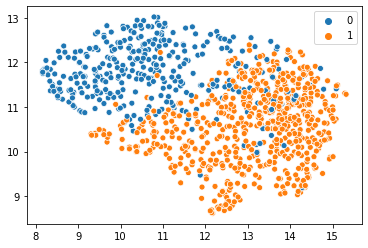

In [15]:
# See how good a job this giant sparse matrix does at splitting
import umap # Dimensionality reduction similar to t-SNE - see https://umap-learn.readthedocs.io/en/latest/
embedding = umap.UMAP().fit_transform(X_train_counts)

import seaborn as sns
sns.scatterplot(x=embedding[:,0],y=embedding[:,1],hue=y_train);


## Step 2 - modelling

In [6]:
# generate predictions using a basic model
# credit to https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.03, class_weight='balanced', solver='newton-cg', random_state=42)
clf.fit(X_train_counts, y_train)
y_predicted_counts = clf.predict(X_test_counts)

In [7]:
# Boilerplate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 5))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Wii', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Playstation', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

In [8]:
# Evaluate our model
accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.956, precision = 0.959, recall = 0.956, f1 = 0.955


In [9]:
# more boiler plate
importance = get_most_important_features(count_vectorizer, clf, 10)
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

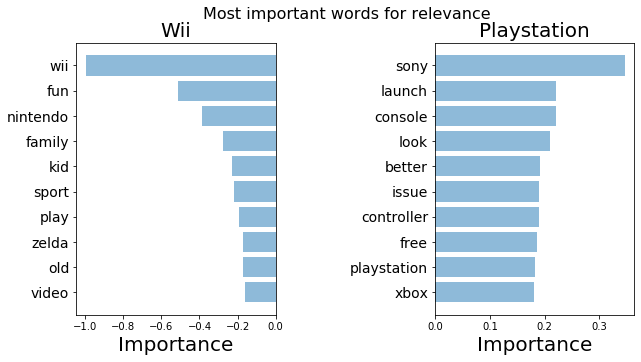

In [35]:
plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

### key take home - once your words are encoded as numbers, you can carry out traditional machine learning
![ml_map](https://scikit-learn.org/stable/_static/ml_map.png)

## So you may be thinking - BORING - there was no deep learning in that example!!!

Alright - let's do a similar thing using **TENSORFLOW** and the [Google Multi-Lingual Universal Sentence Encoder](https://ai.googleblog.com/2019/07/multilingual-universal-sentence-encoder.html)!

In [10]:
# First run setup
!mkdir /tmp/guse
!curl -L "https://tfhub.dev/google/universal-sentence-encoder-large/3?tf-hub-format=compressed" | tar -zxvC /tmp/guse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0  745M    0   568    0     0    245      0  36d 22h  0:00:02  36d 22h   245x ./
x ./tfhub_module.pb
x ./variables/
 98  745M   98  733M    0     0  19.8M      0  0:00:37  0:00:37 --:--:-- 19.1M   0  0:00:41  0:00:11  0:00:30 19.4M
x ./variables/variables.index
x ./assets/
100  745M  100  745M    0     0  19.9M      0  0:00:37  0:00:37 --:--:-- 20.8M



In [11]:
import tensorflow_hub as hub
import tensorflow as tf
guse = hub.Module("/tmp/guse")

def guse_vectors(x):
  embeddings = guse(x)
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    return sess.run(embeddings)

# Resplit data to use raw text (not processed text)
list_corpus_raw = data_prep.reviewText.to_list()
list_labels = data_prep.isPS4.to_list()
X_train_raw, X_test_raw, y_train, y_test = train_test_split(list_corpus_raw, list_labels, test_size=0.20, random_state=40)

/anaconda3/envs/test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [12]:
# Create text vectors, show shape
X_train_guse = guse_vectors(X_train_raw)
X_test_guse = guse_vectors(X_test_raw)
X_train_guse.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


(999, 512)

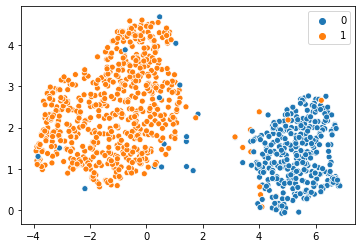

In [23]:
# See if there is signal
embedding2 = umap.UMAP().fit_transform(X_train_guse)
sns.scatterplot(x=embedding2[:,0],y=embedding2[:,1],hue=y_train);

In [24]:
# Generate some preds and evaluate the output!
clf2 = LogisticRegression(C=0.03, class_weight='balanced', solver='newton-cg', 
                         random_state=42, max_iter = 4000)
clf2.fit(X_train_guse, y_train)

y_predicted_guse = clf2.predict(X_test_guse)
accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_guse)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.984, precision = 0.984, recall = 0.984, f1 = 0.984


/anaconda3/envs/nlp201909/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/envs/nlp201909/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [26]:
# Bokeh boilerplate for the next chart
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool, ColorBar
from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [28]:
source = ColumnDataSource(
        data=dict(
            x=embedding2[:,0],
            y=embedding2[:,1],
            desc=X_train_raw,
            color = y_train
        )
    )
hover = HoverTool(
        tooltips=[
            ("(x,y)", "($x, $y)"),
            ("desc", "@desc"),
        ]
    )
mapper = linear_cmap(field_name = 'color', palette=Spectral6, low = 0, high = 1)
p = figure(plot_width=800, plot_height=700, tools=[hover],
           title="Mouse over the dots")
p.circle('x', 'y', size=10, source=source, color=mapper)
color_bar = ColorBar(color_mapper=mapper['transform'], width=8,  location=(0,0))
p.add_layout(color_bar, 'right')

In [29]:
# Use a fancy chart to distract that my model didn't converge
# there's a bunch of bokeh boilerplate not shown
show(p)
# Red are reviews for PS4 on amazon. Blue are reviews for Wii sold on Amazon

![example](static/ps4_vector_example.png)

### You can use this to identify topics quickly.

You can evaluate the raw feedback that's been clustered together (rather than isolated terms) and generate meaningful topics. The results are much easier to interpret than using other techniques (like LDA).
![GroupingExample](static/GroupingExample.png)








### Comparing the processes:

![Classic vs Deep Learning NLP Process](static/ClassicVsDeepLearning.png)
[image reference](https://www.upwork.com/hiring/for-clients/artificial-intelligence-and-natural-language-processing-in-big-data/)

Deep Learning is more convenient (less prep), but much less explainable!

# so to review
- We went through what NLP is, and the **typical** use cases.

- We covered how basic "word vectorization" techniques (bag of words) can unblock practioners from applying machine learning to their text.
   - once your words are numbers, you can use all the traditional supervised and unsupervised algorithms.

- We also showed how cutting edge word vectors can make applying NLP to your text to discover topics very quick and easy 
   - no prep needed - but **you can't interpret the results**. 

# thankyou!

## repo: http://bit.ly/abc-nlp-gp
<br>

### oh and we're hiring ya'll 
https://jobs.lever.co/atlassian